In [1]:
#导入包
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loss函数
def Loss(X,w,y):
    if(len(y)!=len(X)):
        raise "y和X长度不同"
    if(len(X[0])!=len(w)):
        raise "X的列数与w的长度不同"
    err = y-X.dot(w)
    return err.dot(err)*0.5/len(y)


In [3]:
#读取数据
X,y = load_svmlight_file("housing_scale.txt")
X = X.toarray()
#为X添加一维值为 1 的特征，误差计算变为 y - Xw,方便运算
ones = [[1]] * X.shape[0]
X = np.concatenate((X,ones),axis = 1)
#划分训练集合测试集
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [4]:
#-----------------线性回归的闭式解-------------------------------
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print('闭式解训练集Loss:%f'% Loss(X_train,w,y_train))
print('闭式解验证集Loss:%f'% Loss(X_validation,w,y_validation))

闭式解训练集Loss:11.492508
闭式解验证集Loss:10.362012


梯度下降训练集Loss:11.786695
梯度下降验证集Loss:10.534759


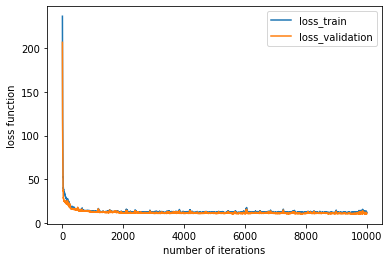

In [5]:
#-----------------线性回归和随机梯度下降-------------------------
#参数初始化
w = np.random.randn(X.shape[1])
learning_rate = 0.01
training_step = 10000
#保存每次迭代的损失函数
loss_train = []
loss_validation = []
#迭代训练
for i in range(training_step):
    #随机选取一个样本
    rand_i = np.random.randint(0,X_train.shape[0])
    x_i = X_train[rand_i]
    y_i = y_train[rand_i]
    #保存当前迭代下的训练集合验证集的损失函数
    loss_train.append(Loss(X_train,w,y_train))
    loss_validation.append(Loss(X_validation,w,y_validation))
    #求损失函数的梯度的反方向G
    D = -(w.dot(x_i)-y_i) * x_i
    #更新参数
    w = w + learning_rate * D
    
print('梯度下降训练集Loss:%f'% loss_train[-1])
print('梯度下降验证集Loss:%f'% loss_validation[-1])
#绘制损失函数变化图
plt.plot(range(training_step),loss_train ,label="loss_train",)
plt.plot(range(training_step),loss_validation ,label="loss_validation")
plt.legend(loc = "best")
ax = plt.gca()
ax.set_xlabel("number of iterations")
ax.set_ylabel("loss function")
plt.show()